# "Image Comparison"
> "In this blog, we test two image comparison method: mean squared error, and structural similarity"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [fastpages, jupyter]
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

#Image Comparison
A vital step in image classification is in assessing the quality of a given image. To avoid labor intensive subjective analysis methods such as DSCQS and SSCQS, there are two commonly employed quantitative methods used to achieve an objective measure of the quality of an image. 

MSE (Mean square error) is a straightforward method with a simple mathematical implementation. A pixel by pixel comparison is performed. Then, one averages the square of the difference in the error between the original and the test image as so:
$EMC=\frac{1}{N}\sum_{i=1}^N |x_i - y_i|^2$

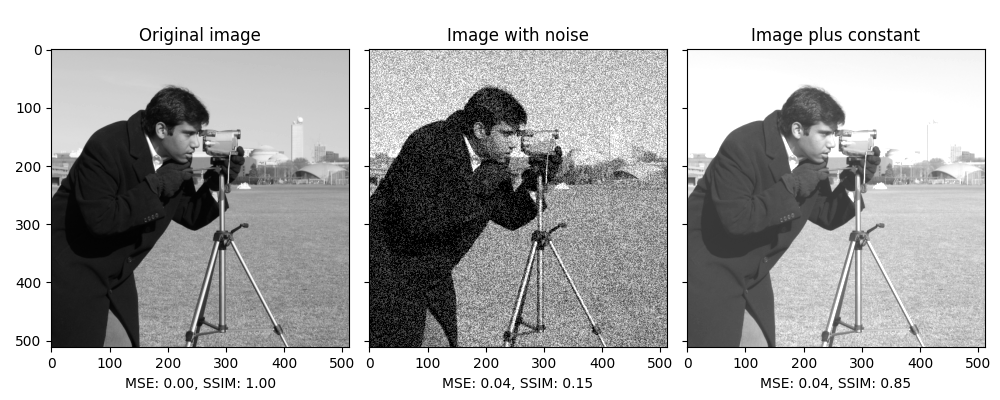

Since figures B and C above are calculated with the same MSE value, it becomes clear that MSE poorly correlates with human perception of objects. SSIM (structural similarity index matrices) poses one improvement designed to overcome this by separating out more variables (luminance, contrast, structure) from a given image to better describe differences in two given image.

SSIM is given by: $SSIM(x,y)=f[l(x,y),c(x,y),s(x,y)]$

Where luminance l(x,y) is: $l(x,y)= \frac{2μ_x μ_y + C1}{μ_x^2 + μ_y^2 +C1}$

Contrast c(x,y) is: $c(x,y)=\frac{2σ_x σy + C2}{σ_x^2 + σ_y^2 + C2}$

And structure s(x,y) is: $s(x,y)=\frac{σ_xy +C3}{σ_x σ_y + C3}$

It should be noted that all three parameters are relatively independent.

## MSE in Python

We use the mean_squared_error from sklearn.metrics, note that this function can only handle 2d array. Shape of two image arrays should also be the same. In this test, we find that the mean squared error is 1.0, which means these two images are completed different. 



In [11]:
import numpy as np
from PIL import Image
from sklearn.metrics import mean_squared_error
# compare black and white image arrays
b_arr = np.zeros((50, 50), dtype=np.uint8)
w_arr = 255*np.ones((50, 50), dtype=np.uint8)
mse_sklearn = mean_squared_error(b_arr, w_arr)
# print MSE between these two images
print("mean squared error between these two images is : ", mse_sklearn)

mean squared error between these two images is :  1.0


We can also write the mean squared error function in numpy. In this way, we can calculate MSE of 3d image arrays. Since RGB values of black image are 0 in all three channels while white image are all 255. We have the same result from the 2d gray scale image.

In [15]:
# numpy MSE
b_arr = np.zeros((50, 50, 3), dtype=np.uint8)
w_arr = 255*np.ones((50, 50, 3), dtype=np.uint8)
mse_np = (np.square(b_arr - w_arr)).mean(axis=None)
print("mean squared error between these two images is : ", mse_np)

mean squared error between these two images is :  1.0


This time we calculate the MSE between a red image and both white and black images.

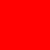

mean squared error between red and black is : 1.0
mean squared error between red and white is : 1.0


In [20]:
r_arr = np.ones((50, 50, 3), dtype=np.uint8)
r_arr[:, :, 0] = 255 * w_arr[:, :, 0]
r_im = Image.fromarray(r_arr)
display(r_im)
mse_rb = (np.square(r_arr - b_arr)).mean(axis=None)
mse_rw = (np.square(r_arr - w_arr)).mean(axis=None)
print("mean squared error between red and black is :", mse_rb)
print("mean squared error between red and white is :", mse_rb)

## SSIM in Python

We use SSIM in skimage.metrics package;

https://scikit-image.org/docs/stable/api/skimage.metrics.html#skimage.metrics.structural_similarity

average RGB value of sample image is :  200.62987309550192


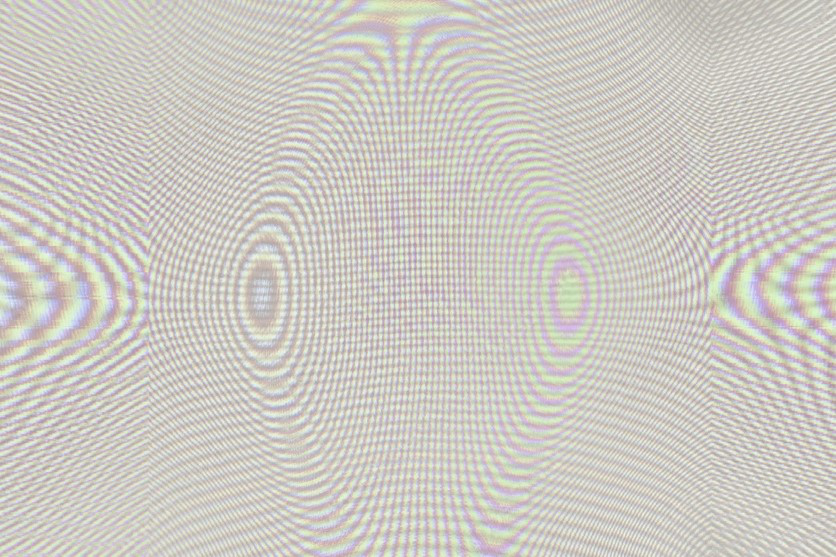

In [91]:
# find the SSIM between an example Moire image and a pure color image
sample_im = Image.open("/content/sample_moire_image.jpg")
sample_im_arr = np.array(sample_im)
print("average RGB value of sample image is : ", np.mean(sample_im_arr))
display(sample_im)

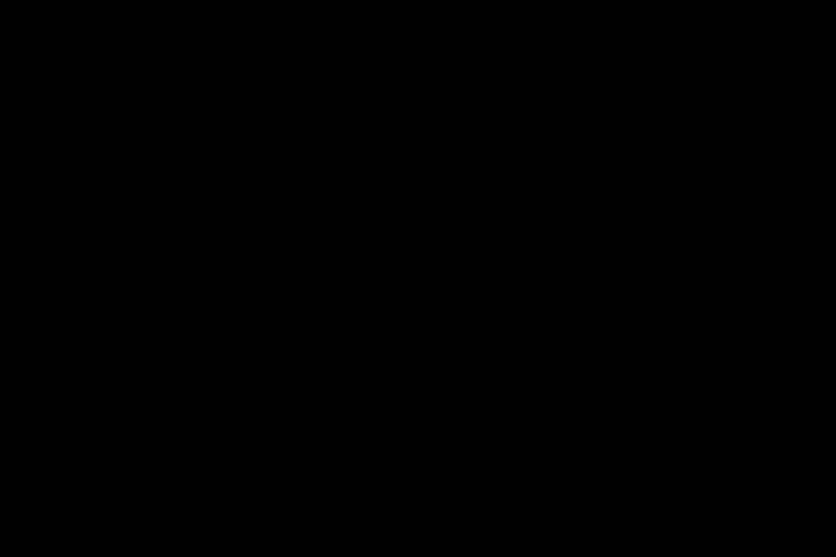

In [92]:
# create a pure color image with no Moire stipes to compare with 
# use a image here as a reference with RGB value is 1
reference_bl_arr = np.ones(sample_im_arr.shape, dtype=np.uint8)
reference_bl = Image.fromarray(reference_bl_arr)
display(reference_bl)

In [93]:
import skimage
from skimage.metrics import structural_similarity as ssim
# current skimage version
print("skimage version is : ", skimage.__version__)
# find SSIM 
ssim_score = ssim(sample_im_arr, reference_bl_arr, multichannel=True, data_range=255, full=False)
print("The SSIM between sample image and the reference is : ", ssim_score)

skimage version is :  0.18.3
The SSIM between sample image and the reference is :  0.0027110874138337065


We can easily tell that the similarity between our sample image and this reference image is low. Note that the this is also showed in structural similarity score between these two images. The SSIM score is low very low at 0.0027, now we try a brighter image as reference to see the difference.  

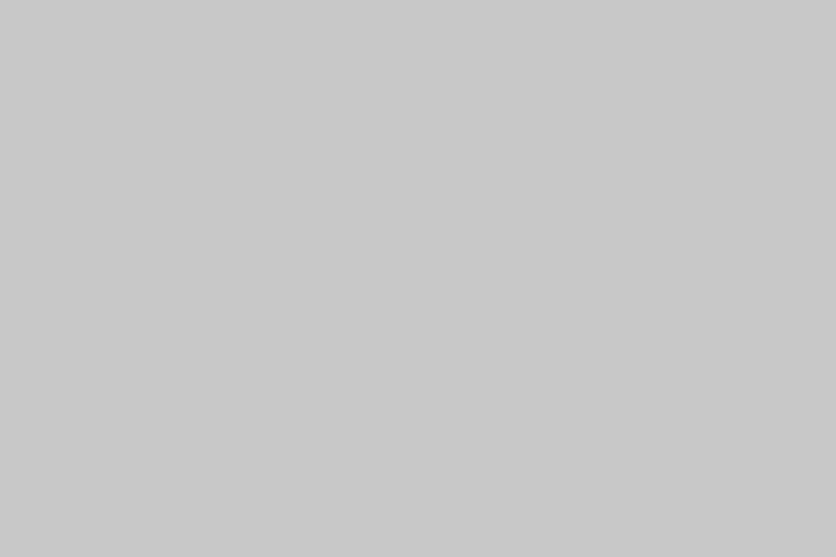

In [94]:
# change RGB value to 200
reference_gr_arr = 200 * reference_bl_arr
reference_gr = Image.fromarray(reference_gr_arr)
display(reference_gr)

In [95]:
# find SSIM 
ssim_score = ssim(sample_im_arr, reference_gr_arr, multichannel=True, full=False)
print("The SSIM between sample image and the reference is : ", ssim_score)

The SSIM between sample image and the reference is :  0.2669812244220689


Note that we use a gray image with RGB value 200 for the reference this time to match up the average RGB value of our sample image. And the strutral similarity this time, 0.266, is much higher than the first reference. But still this score show low structral similarity between sample and reference. The max SSIM score is 1.0, which means sample and reference are the same. We can still tell that the similarity is still pretty low by looking at the sample and second reference image. The sample has color fringes where reference is smooth. The SSIM score proves our observation.

Citations:

[What is DSCQS?](http://www.kwillcorporation.com/technology/dscqs.html)

[MSE Vs SSIM](https://www.ijser.org/researchpaper/MSE-Vs-SSIM.pdf)

[Structural Similarity Index](https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html)

Image comparison methods are widely used in our optical design @FlexTouch™